<h1 align=center><font size = 5>Trabajo Práctico Módulo 4: 
Redes Neuronales </font></h1> 

### **Tabla de contenidos**

  1. [Consignas](#q1) 
  2. [Importación de librerias](#q2) 
  3. [Importación de datos](#q3) 
  4. [Limpieza de datos](#q4)
  5. [Manejo de outliers](#q5)  
  6. [Valores Nulos](#q6)  
  7. [EDA](#q7)  
  8. [Label processing](#q8)  
  9. [Split Train and Test data](#q9)
  10. [Randon Forest](#q10)  
  11. [Red Neuronal](#q11)


**Consigna:**  <a name="q1"></a>
 
1. Entrenar una red neuronal, utilizando el framework keras, que permita estimar el precio de un vehículo a partir de las mismas features utilizado en el modelo ya calculado.

2. Evaluar la performance del modelo a partir de la relación de las métricas utilizadas y de la función de costo a lo largo de las épocas e iterarlo:
 * Aumentar la complejidad (número de neuronas, capas)
 * Testear al menos 3 optimizadores.
 * Evaluar utilizando los datos escalados / sin escalar.
 * Aumentar la cantidad de épocas de entrenamiento.
 * Incorporar early stopping a la función de entrenamiento.
 
3. Obtener conclusiones tanto sobre la mejor configuración para el modelo en cuestión, como en su comparación con el modelo ya entrenado en el notebook como baseline.








#### Importando Librerias <a name="q2"></a>



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Para transformar la notación científica

#### Importo datos <a name="q3"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP4/vehicles.csv')

In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nc,nan,nan,NaN


In [ ]:
df.shape

(426880, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.manufacturer.value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


#### Limpieza de datos <a name="q4"></a>

In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nc,nan,nan,NaN


Se puede ver que hay algunas observaciones muy generales para usar por lo que procedemos a eliminarlas.

In [ ]:
#Eliminamos columnas

df= df.drop(columns=['id','url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long','county','region', 'posting_date'], axis=1)

In [ ]:
#Vemos el dataset con las colummas finales

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
#Describimos el dataset

df.describe()

,price,year,odometer
count,426880.000,425675.000,422480.000
mean,75199.033,2011.235,98043.331
std,12182282.174,9.452,213881.501
min,0.000,1900.000,0.000
25%,5900.000,2008.000,37704.000
50%,13950.000,2013.000,85548.000
75%,26485.750,2017.000,133542.500
max,3736928711.000,2022.000,10000000.000


El dataset cuenta con aproximadamente 426 mil registros; siendo sus principales variables descriptivas **precio, año de fabricación y odómetro.**

Se puede apreciar que:

**Precio**: el 75% de los autos se encuentra por debajo de $ 26.500; no obstante, existe una diferencia notoria entre el precio mínimo y máximo, lo cual distorsiona los valores (y la media es muy elevada). Esto indicaría la presencia de valores extremos, que pueden ser outliers por error, o bien corresponder a los modelos de más alta gama y precio.  

**Año de fabricación**: vemos que el año mínimo es 1900 y el máximo 2022 (cero km).  
Aquí también existen outliers (autos con 100 años de antigüedad).  

**Odómetro**: cuenta kilómetros del auto, también posee valores extremos outliers (10 millones de km), que distorsiona los valores (y la media es muy elevada).


### Manejo de outliers <a name="q5"></a>

#### Veamos si hay outliers en el precio

In [ ]:
quantile1, quantile3= np.percentile(df.price,[10,90])

In [ ]:
print(quantile1,quantile3)

500.0 37590.0


In [ ]:
df=df[(df.price < 27500) & (df.price >= 500)]
df.shape

(285044, 15)

#### Observemos la columna odometer


In [ ]:
r=sorted(df["odometer"])
r[:30]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Hay nan y 0.0

In [ ]:
#Vemos la cantidad de nulos en la columna odometer

df["odometer"].isna().sum()

1650

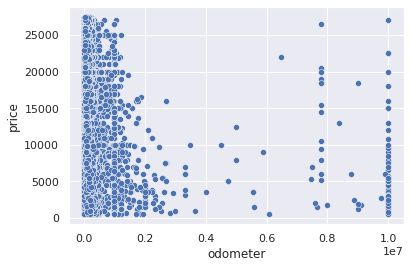

In [ ]:
#Vemos la correlación entre odometer y precio

ax = sns.scatterplot(x="odometer", y="price", data=df)

In [ ]:
#Vemos el valor máximo de la columna odometer

df["odometer"].max()

10000000.0

In [ ]:
#Eliminamos los registros donde odometer es igual a cero

df.drop(df[df["odometer"]==0.0].index,inplace=True)

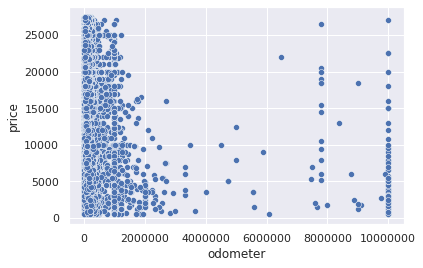

In [ ]:
#Graficamos nuevamente

ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [ ]:
df["odometer"].isna().sum()

1650

Podriamos considerar los valores por encima de 3.000.000 como raros, por lo tanto los filtramos

In [ ]:
df=df[(df.odometer < 3000000)]

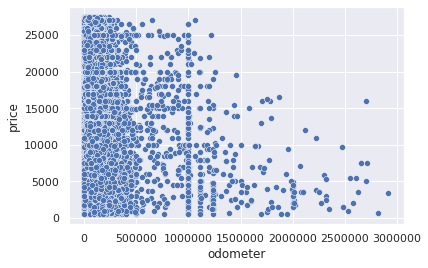

In [ ]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [ ]:
df["odometer"].isna().sum()

0

In [ ]:
#Vemos la cantidad de nulos en año

df["year"].isna().sum()

339

In [ ]:
#Vemos el mínimo en año

df["year"].min()

1900.0

In [ ]:
#Eliminamos los valores nulos de la columna año

df=df.dropna(subset=['year'])

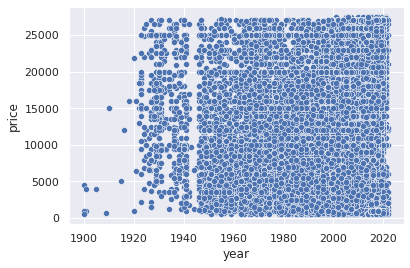

In [ ]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [ ]:
#Nos quedamos con los años mayores a 1940

df=df[(df.year > 1940)]

### Valores Nulos <a name="q6"></a>

In [ ]:
#Vemos la proporción de nulos

null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,18943200,67.281
cylinders,10940000,38.856
condition,10460200,37.152
drive,8438300,29.970
paint_color,8380200,29.764
type,6646900,23.608
manufacturer,1046100,3.715
title_status,514300,1.827
model,334100,1.187
fuel,164100,0.583


In [ ]:
#Vemos la distribución de la columna "condición"

df.condition.value_counts()

excellent    77753
good         76688
like new     14909
fair          6494
new            573
salvage        536
Name: condition, dtype: int64

In [ ]:
#Vemos el odometer promedio por condición

excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [ ]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 93809.59
Excellent average odometer: 114903.02
Good average odometer: 105998.14
Fair average odometer: 175931.82
Salvage average odometer: 168803.65


In [ ]:
#Si el year es 2019 o mayor, vamos a completar los nulos con "new"

df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [ ]:
#Completo nulos

df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,18943200,67.281
cylinders,10940000,38.856
drive,8438300,29.970
paint_color,8380200,29.764
type,6646900,23.608
manufacturer,1046100,3.715
title_status,514300,1.827
model,334100,1.187
fuel,164100,0.583
transmission,110400,0.392


Eliminamos los que tienen menos de 5%.

In [ ]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

Elimino size porque tiene demasiados nulos

In [ ]:
df=df.drop(["size"],axis=1)

In [ ]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,10100400,38.766
drive,7547200,28.967
paint_color,7398000,28.394
type,6068900,23.293
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [ ]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [ ]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [ ]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           1
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
df=df.dropna(subset=['cylinders','drive'])

In [ ]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

### EDA <a name="q7"></a>

In [ ]:
from scipy import stats

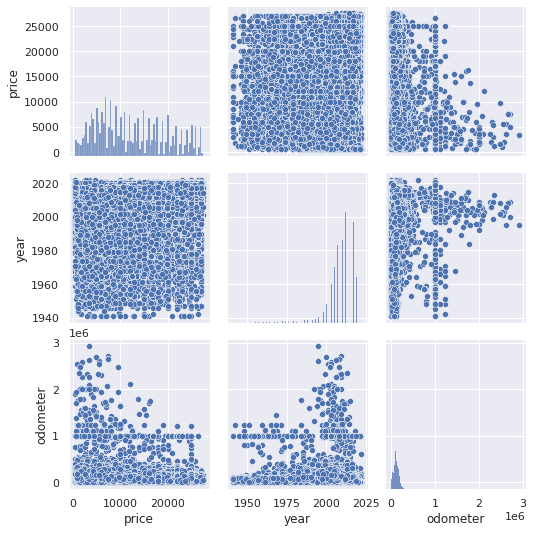

In [ ]:
sns.pairplot(df)

In [ ]:
#Comprobamos que no hay nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260544 entries, 31 to 426875
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         260544 non-null  int64  
 1   year          260544 non-null  float64
 2   manufacturer  260544 non-null  object 
 3   model         260544 non-null  object 
 4   condition     260544 non-null  object 
 5   cylinders     260544 non-null  object 
 6   fuel          260544 non-null  object 
 7   odometer      260544 non-null  float64
 8   title_status  260544 non-null  object 
 9   transmission  260544 non-null  object 
 10  drive         260544 non-null  object 
 11  type          260544 non-null  object 
 12  paint_color   260544 non-null  object 
 13  state         260544 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 29.8+ MB


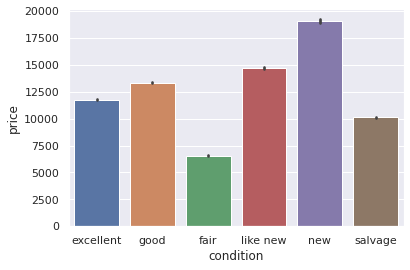

In [ ]:
ax = sns.barplot(x="condition", y="price", data=df)

Vehiculos nuevos son claramente más caros

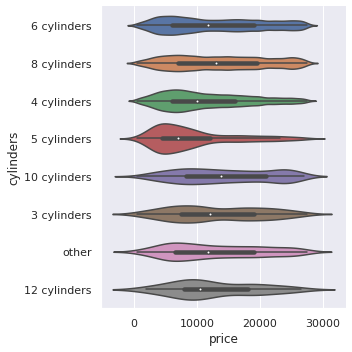

In [ ]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

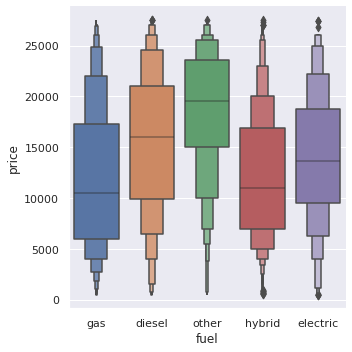

In [ ]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

Podemos describir donde se encuentran la mayoría de los vehículos por tipo de combustible  

Gas= 5k-17k

Diesel= 12k-20k

Hybrid= 7k-15k

Other= 11k-20k

Electric= 10k-18k

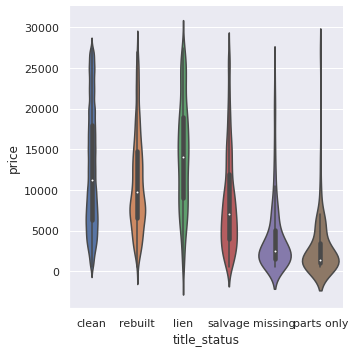

In [ ]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

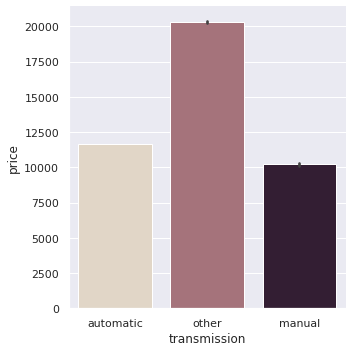

In [ ]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

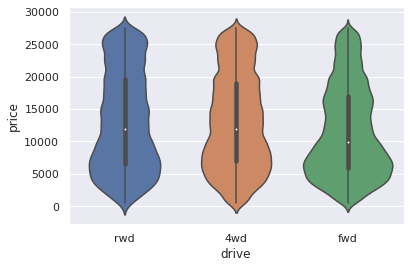

In [ ]:
sns.violinplot(x=df.drive, y=df.price);

No hay mucha diferencia entre las dos primeras categorías. La tercera es un poco diferente.

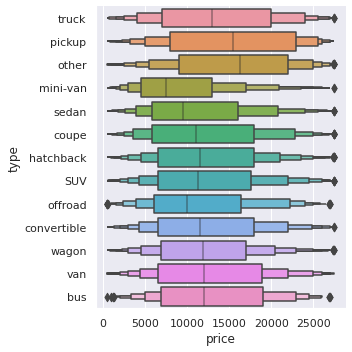

In [ ]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Los precios de los vehículos varían según el tipo de vehículo.


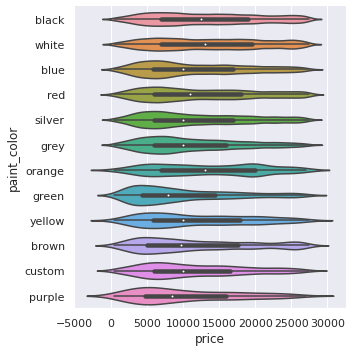

In [ ]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

Aquí también se pueden observar cambios en el precio según el color de la pintura. 

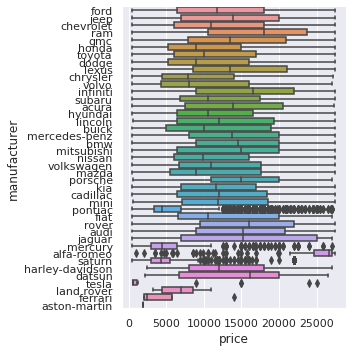

In [ ]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

Esto nos da una idea del precio según la marca del auto.


### Label Processing <a name="q8"></a>


In [ ]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [ ]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [ ]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

### Split Train and Test data <a name="q9"></a>
 

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
y= df.price #Label es el precio, que es lo que queremos predecir
x= df.drop('price',axis=1) #Eliminamos la columna precio ya que esto es lo que queremos predecir

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size = 0.20,random_state =2)

In [ ]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(208435, 13) (208435,)
(52109, 13) (52109,)


### Random Forest <a name="q10"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(x_test,y_test)*100)

Mean Absolute Error: 1848.6
Mean Squared Error: 9101582.9
Root Mean Squared Error: 3016.88
82.68071066311785


En el primer modelo Random Forest vemos que el score es de 82.7%.

# Ahora Ustedes. Construyan una red neuronal, con un modelo secuencial, y la utilización de capas densas, para realizar una regresión. Recuerden que los pasos para construirla son:

Instanciar el modelo

Agregar las capas

Compilar el modelo seleccionando optimizador, función de pérdida y métricas

Entrenar, seleccionando split de validación y épocas.

Graficar la pérdida y exactitud en train y test

Reevaluar el modelo, cambiar capas, neuronas, activación, optimizadores, etc.

## Red Neuronal <a name="q11"></a>

In [ ]:
import numpy as np
from keras.models import Sequential #Forma en la que voy a construir la RN
from keras.layers.core import Dense #Densas: todas conectadas con todas
from keras.initializers import glorot_normal
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import mean_squared_error
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

In [ ]:
x_train.shape

(208435, 13)

In [ ]:
#Creamos la arquitectura de la red para nuestro primer modelo

model_1 = Sequential()
model_1.add(Dense(13, input_dim=13, activation='relu'))
model_1.add(Dense(1,activation="relu"))

In [ ]:
#Instanciamos el primer modelo

model_1.compile(optimizer="rmsprop", loss='mse')

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamos el modelo

history = model_1.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), verbose=2)

Epoch 1/5
5211/5211 - 6s - loss: 46374856.0000 - val_loss: 38220824.0000
Epoch 2/5
5211/5211 - 5s - loss: 35498256.0000 - val_loss: 35378608.0000
Epoch 3/5
5211/5211 - 6s - loss: 35243484.0000 - val_loss: 35499504.0000
Epoch 4/5
5211/5211 - 6s - loss: 35111992.0000 - val_loss: 35081964.0000
Epoch 5/5
5211/5211 - 6s - loss: 35030532.0000 - val_loss: 34965284.0000


In [ ]:
predict = model_1.predict(x_test)

print("Predictions for test car prices is: {}".format(predict))

Predictions for test car prices is: [[15842.312 ]
 [ 9458.807 ]
 [ 7802.1196]
 ...
 [18634.895 ]
 [12123.889 ]
 [13555.453 ]]


In [ ]:
print("Mean squared error between test_labels and predictions is: {}".format(mean_squared_error(y_test, predict)))

NameError: ignored

In [ ]:
print("R2 score between test_labels and predictions is: {}".format(r2_score(y_test, predict)))

NameError: ignored

Se puede apreciar que la función de costo arroja valores muy grandes y un accuracy de 0, pero para la última época decreció. Esto puede deberse a que los datos no están escalados, la cantidad de épocas o capas no son suficientes o que la función de activación no es la más apropiada.



Antes de continuar, vamos a escalar los datos ya que sabemos que las redes neuronales no funcionan correctamente con datos no escalados y podemos verificarlo con las métricas obtenidas en el primer modelo.



In [ ]:
train_net = (x - x.mean()) / x.std()

In [ ]:
labels_net = (y - y.mean()) / y.std() 

In [ ]:
x_train_net , x_test_net , y_train_net , y_test_net = train_test_split(train_net , labels_net , test_size = 0.20, random_state =42)

In [ ]:
print (x_train_net.shape, y_train_net.shape)
print (x_test_net.shape, y_test_net.shape)

(208435, 13) (208435,)
(52109, 13) (52109,)


In [ ]:
#Creamos la arquitectura de la red para nuestro segundo modelo

model_2 = Sequential()
model_2.add(Dense(13, input_dim=13, activation='relu'))
model_2.add(Dense(1,activation="relu"))

In [ ]:
#Instanciamos el segundo modelo

model_2.compile(optimizer="rmsprop", loss='mse')

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamos el modelo

history = model_2.fit(x_train_net, y_train_net, epochs=10, validation_data=(x_test_net, y_test_net), verbose=2)

Epoch 1/10
6514/6514 - 8s - loss: 0.7182 - acc: 0.0000e+00 - val_loss: 0.6940 - val_acc: 0.0000e+00
Epoch 2/10
6514/6514 - 8s - loss: 0.6890 - acc: 0.0000e+00 - val_loss: 0.6859 - val_acc: 0.0000e+00
Epoch 3/10
6514/6514 - 8s - loss: 0.6852 - acc: 0.0000e+00 - val_loss: 0.6845 - val_acc: 0.0000e+00
Epoch 4/10
6514/6514 - 8s - loss: 0.6830 - acc: 0.0000e+00 - val_loss: 0.6831 - val_acc: 0.0000e+00
Epoch 5/10
6514/6514 - 8s - loss: 0.6818 - acc: 0.0000e+00 - val_loss: 0.6833 - val_acc: 0.0000e+00
Epoch 6/10
6514/6514 - 8s - loss: 0.6808 - acc: 0.0000e+00 - val_loss: 0.6801 - val_acc: 0.0000e+00
Epoch 7/10
6514/6514 - 8s - loss: 0.6799 - acc: 0.0000e+00 - val_loss: 0.6792 - val_acc: 0.0000e+00
Epoch 8/10
6514/6514 - 8s - loss: 0.6790 - acc: 0.0000e+00 - val_loss: 0.6785 - val_acc: 0.0000e+00
Epoch 9/10
6514/6514 - 8s - loss: 0.6783 - acc: 0.0000e+00 - val_loss: 0.6790 - val_acc: 0.0000e+00
Epoch 10/10
6514/6514 - 8s - loss: 0.6772 - acc: 0.0000e+00 - val_loss: 0.6774 - val_acc: 0.0000e+00

In [ ]:
test_loss, test_acc = model_2.evaluate(x_test_net, y_test_net)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1629/1629 [==============================] - 2s 1ms/step - loss: 1.0011 - acc: 0.0000e+00
Test loss: 1.0010898113250732
Test accuracy: 0.0


In [ ]:
predict = model.predict(X_test_net)

In [ ]:
print("Mean squared error between test_labels and predictions is: {}".format(mean_squared_error(y_test_net, predict)))

In [ ]:
print("R2 score between test_labels and predictions is: {}".format(r2_score(y_test_net, predict)))